# 1.Free parameter inference

## Google drive mount 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [5]:
ls

 고전역학/
'데이터사이언스 스쿨 개인공부'/
'04.07 피봇테이블과 그룹분석.ipynb'
'0. Corona Virus Dataset'/
'100. 데이터경진대회 분석 시작.ipynb'
'1. Backup Files'/
'1 머신러닝(Machine Learning) 개념.ipynb'
'2020빅콘테스트 문제데이터(혁신아이디어분야)'/
'2. Classroom : 빅데이터 인공지능'/
'4. (연구) Peak Detection & Curve-Fitting'/
'5peak 3 para when it worksss.ipynb'
'Colab Notebooks'/
'Copy of Hyoungsun Park - _네이버 블로그 스크래핑.ipynb'
'연구 최종코드 진행중.ipynb'
'코로나 바이러스 데이터 분석.ipynb'
'Project : 빅데이터 인공지능 '/
 XPS/


In [6]:
cd XPS

/content/gdrive/My Drive/XPS


In [7]:
ls

ITO_O1s_bg.txt        ITO_O1s_p1.txt  P3HT_S2p_bg.txt        P3HT_S2p_p1.txt
ITO_O1s_exp.txt       ITO_O1s_p2.txt  P3HT_S2p_exp.txt       P3HT_S2p_p2.txt
ITO_O1s_fitting.txt   ITO_O1s_p3.txt  P3HT_S2p_fitting.txt
ITO_O1s_numerics.txt  model.png       P3HT_S2p_numerics.txt


## P3HT_S2p Data Visualization

### Data load and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

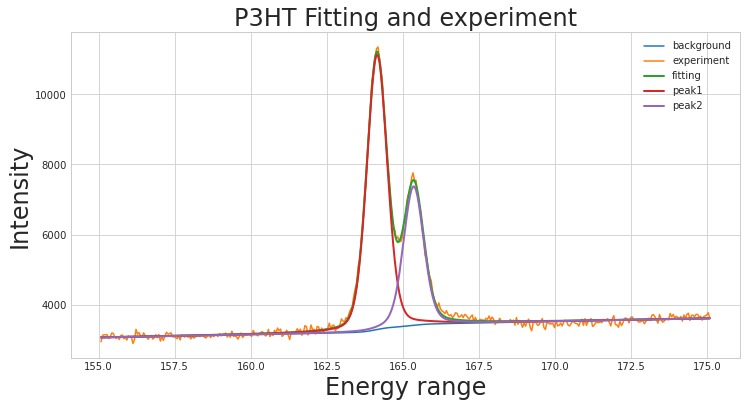

In [2]:
plt.figure(figsize = (12, 6))

plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [3]:
# 실험 데이터의 grid number 파악하기
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)

# Background 제거
reduced_exp = exp[:, 1] - bg[:, 1]
reduced_peak1 = peak1[:, 1] - bg[:, 1]
reduced_peak2 = peak2[:, 1] - bg[:, 1]

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))


(401,)
(401,)
(600,)
(401,)
(401,)
XPS exp 최소값: -257.34102742614186,  최대값: 8062.741706161443
XPS peak1 최소값: 2.3131095757403273,  최대값: 7841.498304700606
XPS peak2 최소값: 1.3009478766489337,  최대값: 3965.7549875173377


### P3HT-Peak1

In [4]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 164.15
    x1 = 164.13
    w = 0.789
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[ 5.08563648e-01 -4.44264315e-01  7.92940661e+03]


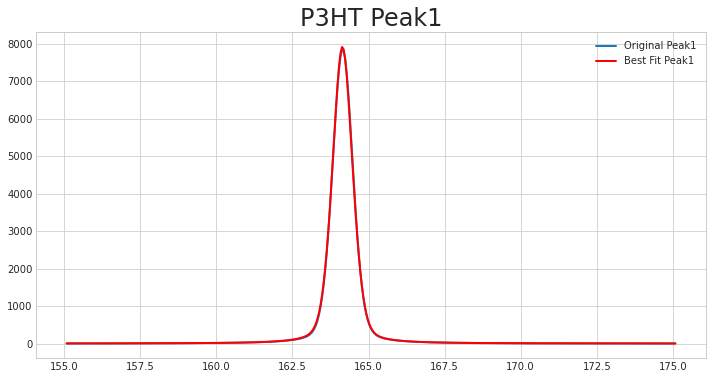

In [5]:
from scipy.optimize import curve_fit

initial_guess = [1.1, 0.587, 8000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("P3HT Peak1", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### P3HT-Peak2

In [6]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 165.35
    x1 = 165.36
    w = 0.786
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09599989e-01 4.41623090e-01 4.01031417e+03]


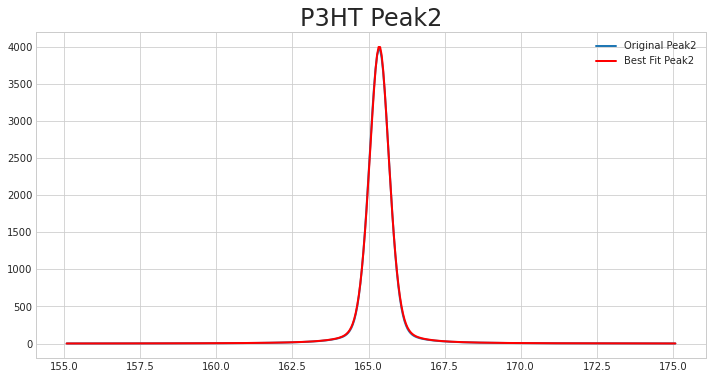

In [7]:
initial_guess = [4.1, 0.787, 3500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:, 0], voigt(peak2[:, 0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)
plt.title("P3HT Peak2", size = 24)
plt.legend()
plt.grid(True)
plt.show();

## ITO_01s Data Visualizaton

### Data load and plotting

In [8]:
# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

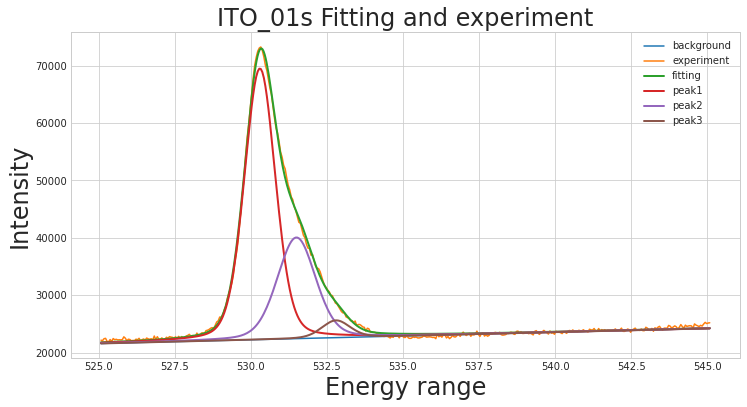

In [9]:
# Plotting data
plt.figure(figsize = (12, 6))
plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], peak3[:, 1], label = "peak3", linewidth = 2)

plt.grid(True)
plt.title("ITO_01s Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [10]:
# 실험 데이터의 Grid number 파악
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)
print(peak3[:, 0].shape)

# Background 제거
reduced_exp = (exp[:, 1] - bg[:, 1])
#reduced_fit = (fitting[:, 1] - bg[:, 1]) 
reduced_peak1 = (peak1[:, 1] - bg[:, 1])
reduced_peak2 = (peak2[:, 1] - bg[:, 1])
reduced_peak3 = (peak3[:, 1] - bg[:, 1])

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
#print(reduced_fit.min(), reduced_fit.max())
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))
print("XPS peak3 최소값: {},  최대값: {}".format(reduced_peak3.min(), reduced_peak3.max()))

(401,)
(401,)
(600,)
(401,)
(401,)
(401,)
XPS exp 최소값: -659.0581009918606,  최대값: 50997.315899628484
XPS peak1 최소값: 17.59834339318695,  최대값: 47217.52315118213
XPS peak2 최소값: 11.877135515947884,  최대값: 17624.715464385725
XPS peak3 최소값: 1.3522435990598751,  최대값: 3007.1755983841613


### ITO-Peak1

In [11]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))

def voigt(x, beta, gamma, amp):
    x0 = 530.3
    x1 = 530.29
    w = 1.199
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09791537e-01 4.41140472e-01 4.76944215e+04]


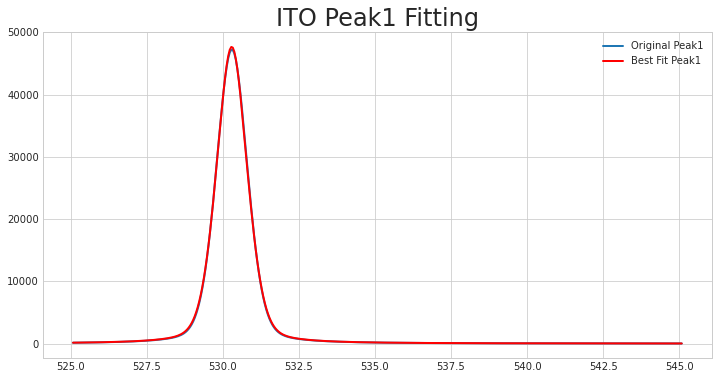

In [12]:
initial_guess = [1.2, 0.2, 45000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("ITO Peak1 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak2

In [13]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 531.5
    x1 = 531.49
    w = 1.484
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09500063e-01 4.40710735e-01 1.77975109e+04]


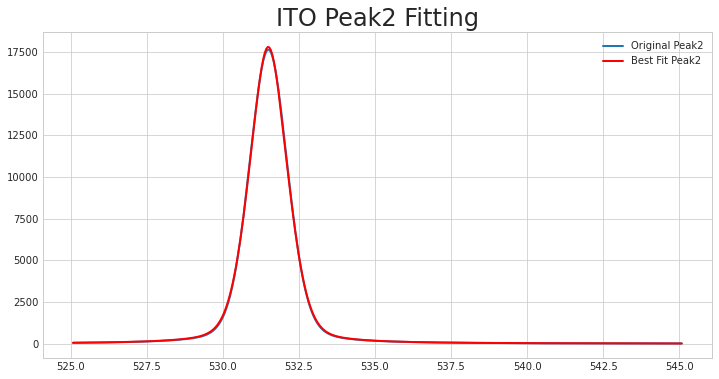

In [14]:
initial_guess = [0.2, 1.2, 17500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:,0], voigt(peak2[:,0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)

plt.title("ITO Peak2 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak3

In [15]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 532.8
    x1 = 532.79
    w = 1.095
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09789031e-01 4.41127626e-01 3.03808246e+03]


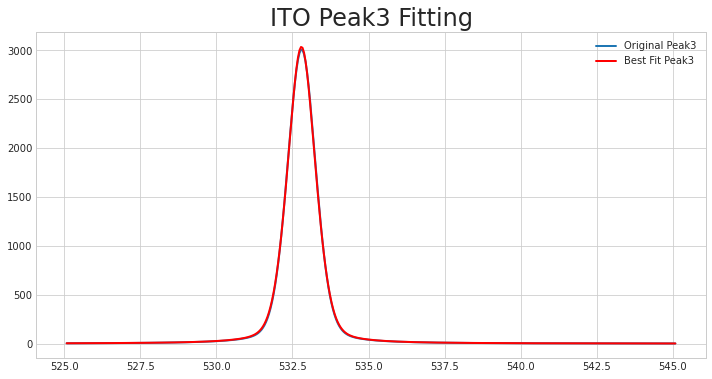

In [16]:
initial_guess = [0.2, 1.2, 3500 ] 
popt, pcov = curve_fit(voigt, peak3[:,0], peak3[:,1] - bg[:, 1], p0 = initial_guess)
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak3[:, 0], peak3[:, 1] - bg[:, 1], label = "Original Peak3", linewidth=2)
plt.plot(peak3[:,0], voigt(peak3[:,0], *popt), label = "Best Fit Peak3", color='red', linewidth=2)

plt.title("ITO Peak3 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

In [17]:
# 모두 거의 같음! 확인 ㅎㅎㅎ
# 값을 정밀하게 입력하지 않으면 오차가 커지는 것이었다!

#[5.08563648e-01 -4.44264315e-01  7.92940661e+03]
#[5.10542151e-01 4.39291707e-01 4.01018290e+03]

#[5.09791537e-01 4.41140472e-01 4.76944215e+04]
#[5.09500063e-01 4.40710735e-01 1.77975109e+04]
#[5.09789031e-01 4.41127626e-01 3.03808246e+03]

SyntaxError: invalid syntax (<ipython-input-17-32e6a91729e9>, line 4)

# 2.Machine Learning Start!

## Data Generation

In [18]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect
plt.style.use(["seaborn-whitegrid"])

# ========== Parameter Matrix generation ==========
N = 3  # Maximum number of the possible peak
Data_size = 3000000

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(3000000, 3, 3)


In [19]:
# Now we use the new model funtion : 
# voigt function = linear combination of Gaussian and Lorentzian function with some ratio 0.3

def voigt(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

    return result 
    

In [20]:
# ========== x-domain range ==========
x = np.linspace(0, 15, 401) 
print(len(x))


401


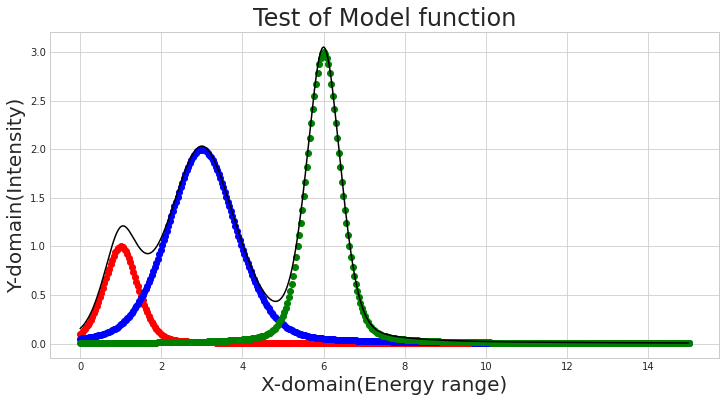

In [21]:
# ========== Checking out of the voigt function ==========
params = [1, 1, 1, 2, 3, 2, 3, 6, 1]

plt.figure(figsize = (12, 6))
plt.plot(x, voigt(x, *params), color = 'black')

plt.scatter(x, voigt(x, *params[:3]), color = 'red')
plt.scatter(x, voigt(x, *params[3:6]), color = 'blue')
plt.scatter(x, voigt(x, *params[6:]), color = 'green')

plt.title("Test of Model function", size = 24)
plt.xlabel("X-domain(Energy range)", size = 20)
plt.ylabel("Y-domain(Intensity)", size = 20)
plt.grid(True)
plt.show()

In [22]:
# ========== Generation of Voigt function Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Voigt function

        center1 = 4 + 0.5*np.random.rand() - 0.25
        center2 = 6 + 0.5*np.random.rand() - 0.25
        center3 = 8 + 0.5*np.random.rand() - 0.25
        center4 = 10 + 0.5*np.random.rand() - 0.25
        center5 = 12 + 0.5*np.random.rand() - 0.25
        
        #                                       amplitude      center        width
        Parameters[i][0] = np.array([[np.random.rand(), center1, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][1] = np.array([[np.random.rand(), center2, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][2] = np.array([[np.random.rand(), center3, 0.7 + 0.8*np.random.rand() ]])
        #Parameters[i][3] = np.array([[np.random.rand(), center4, 0.6 + 1.5*np.random.rand() ]])
        #Parameters[i][4] = np.array([[np.random.rand(), center5, 0.6 + 1.5*np.random.rand() ]])

        
# Check out
print(Parameters)  

[[[8.01245407e-01 3.95023098e+00 1.08205668e+00]
  [2.77847580e-01 5.96827036e+00 1.33001300e+00]
  [5.81317210e-01 8.04791752e+00 1.47233608e+00]]

 [[6.39652551e-01 3.83531288e+00 1.11860375e+00]
  [5.43117527e-04 6.07938315e+00 1.33539900e+00]
  [4.96419318e-01 8.13690854e+00 1.20248850e+00]]

 [[4.77767555e-01 3.98121431e+00 1.38410466e+00]
  [7.93478994e-01 6.18814600e+00 7.14391334e-01]
  [8.26042531e-01 8.11367454e+00 9.22607883e-01]]

 ...

 [[5.75816152e-01 3.78501315e+00 1.41510549e+00]
  [8.02262612e-01 5.90929144e+00 8.45064249e-01]
  [6.59240693e-01 7.85462856e+00 1.09845980e+00]]

 [[4.69074642e-01 3.93469857e+00 8.33826651e-01]
  [5.66524266e-01 6.04517326e+00 7.37490174e-01]
  [1.32666776e-01 8.06905087e+00 8.99591466e-01]]

 [[8.49923190e-01 3.87874843e+00 1.01371681e+00]
  [5.74266546e-01 5.89897124e+00 1.36804772e+00]
  [7.09011343e-02 7.81166992e+00 9.98590937e-01]]]


In [23]:
# ========== Data Generation ==========

GRAPH = []     # y-value of the Voigt function
AREA = []      # Area of the Voigt funtion
NUM_PEAK = []  # Number of peak
AMPLITUDE = [] # Amplitude
CENTER = []    # Center
WIDTH = []     # Width

for j in Parameters:

    peak = random.randint(2, N)  # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshaping to put it as *args

    # Appending to list
    GRAPH.append(voigt(x, *j[0:3*peak]))
    AREA.append(sum(voigt(x, *j[0:3*peak])))
    NUM_PEAK.append(peak)
    AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
    CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
    WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))
    

In [24]:
# ========== Conversion to Numpy.array ==========
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)
AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# ========== Checking out the shape ==========
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)
print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(3000000, 401)
(3000000,)
(3000000,)
(3000000, 3)
(3000000, 3)
(3000000, 3)


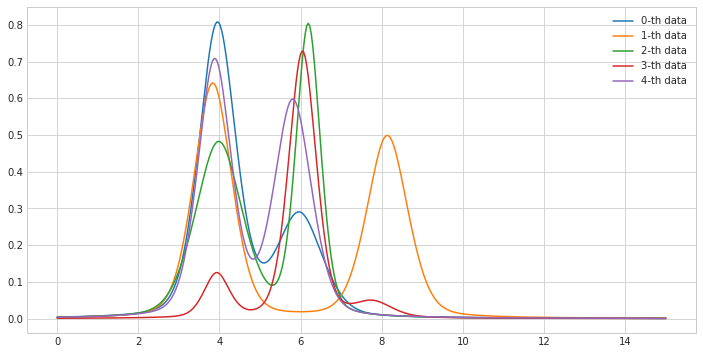

In [25]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))

for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)

In [26]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:2800000])
val_graph   = np.array(GRAPH[2800000:2950000])
test_graph  = np.array(GRAPH[2950000:])

# area label
train_area = np.array(AREA[:2800000])
val_area   = np.array(AREA[2800000:2950000])
test_area  = np.array(AREA[2950000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:2800000])
val_num_peak   = np.array(NUM_PEAK[2800000:2950000])
test_num_peak  = np.array(NUM_PEAK[2950000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:2800000])
val_amp   = np.array(AMPLITUDE[2800000:2950000])
test_amp  = np.array(AMPLITUDE[2950000:])

# center label
train_center = np.array(CENTER[:2800000])
val_center   = np.array(CENTER[2800000:2950000])
test_center  = np.array(CENTER[2950000:])

# width label
train_width = np.array(WIDTH[:2800000])
val_width   = np.array(WIDTH[2800000:2950000])
test_width  = np.array(WIDTH[2950000:])

In [27]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(2800000, 401) (2800000,) (2800000,) (2800000, 3) (2800000, 3) (2800000, 3)
(150000, 401) (150000,) (150000,) (150000, 3) (150000, 3) (150000, 3)
(50000, 401) (50000,) (50000,) (50000, 3) (50000, 3) (50000, 3)


In [28]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(2800000, len(x), 1)
val_graph   = val_graph.reshape(150000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(2800000, 401, 1)
(150000, 401, 1)
(50000, 401, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 302, 32)      3232        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 151, 32)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 102, 16)      25616       max_pooling1d[0][0]              
______________________________________________________________________________________________

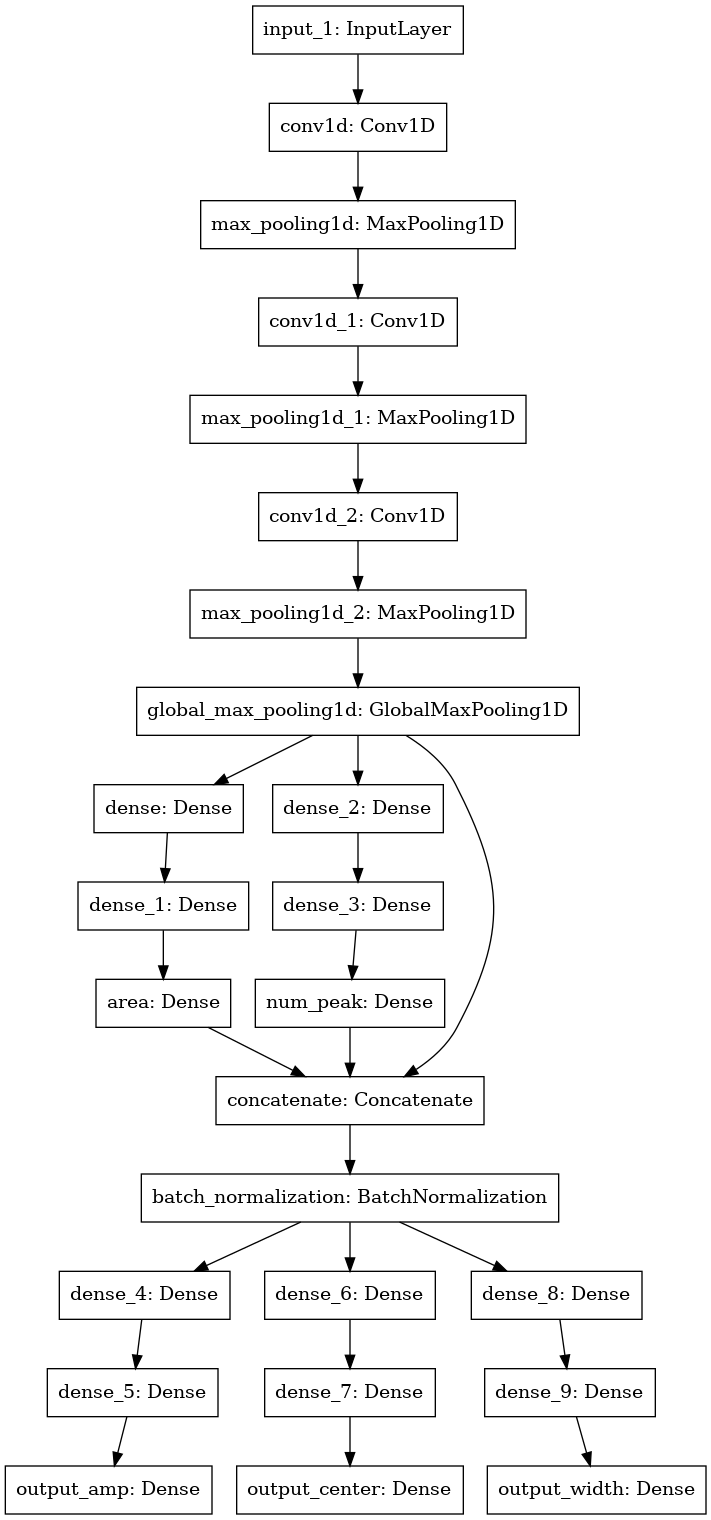

In [29]:
# 최대한 간단한 구조로 만들기!

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))
#main_inputs2 = BatchNormalization()(main_inputs)

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(32, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)

x_conv2 = Conv1D(16, kernel_size = 50, activation = 'relu')(x_pooling1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)

x_conv3 = Conv1D(16, kernel_size = 25, activation = 'relu')(x_pooling2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)

x_GMpooling = GlobalMaxPooling1D()(x_pooling3)


# output : area
hidden_area1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_area2 = Dense(50, activation = 'relu')(hidden_area1)
output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)


# output : number of peak
hidden_num_peak1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(50, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)


# merging features into one layer
merge = concatenate([output_area, output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)


# prediction output
hidden_amp1 = Dense(100, activation = 'relu')(merge2)
hidden_amp2 = Dense(50, activation = 'relu')(hidden_amp1)
output_amp = Dense(3, activation = 'linear', name = 'output_amp')(hidden_amp2)

hidden_center1 = Dense(100, activation = 'relu')(merge2)
hidden_center2 = Dense(50, activation = 'relu')(hidden_center1)
#hidden_center3 = Dense(30, activation = 'relu')(hidden_center2)
output_center = Dense(3, activation = 'linear', name = 'output_center')(hidden_center2)

hidden_width1 = Dense(100, activation = 'relu')(merge2)
hidden_width2 = Dense(50, activation = 'relu')(hidden_width1)
#hidden_width3 = Dense(30, activation = 'relu')(hidden_width2)
output_width = Dense(3, activation = 'linear', name = 'output_width')(hidden_width2)



# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_area, output_num_peak, output_amp, output_center, output_width])

# Summarize layers
print(model.summary())
# plot graph
plot_model(model)

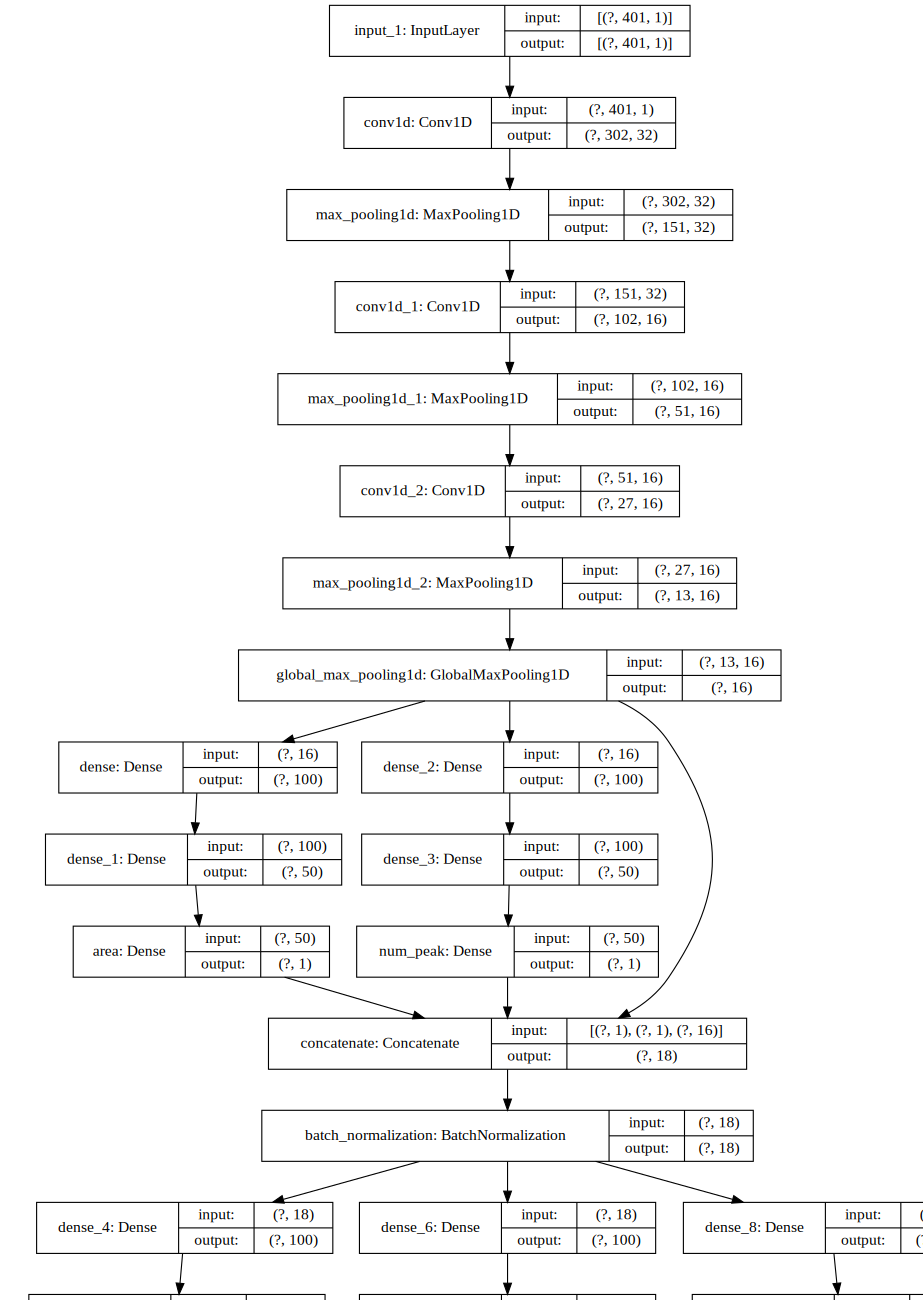

In [30]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [31]:
# 학습방법 설정
model.compile(loss = ['mse', 'mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [32]:
# 이 부분에서 콜백 함수에 넣을 콜백리스트 정의할 것!
import keras

callbacks_list = [
    # 조기종료 콜백함수 : val loss 감시, 10에폭까지 기다림
    #keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
    
    # 모델 체크포인트 콜백함수 : 모델을 h5로 저장, 최적 모델만을 저장
    keras.callbacks.ModelCheckpoint(filepath = "LAST_CODE_Model_1.h5", monitor = 'val_loss', save_best_only = True),
    
    # 학습률 감소 콜백함수 : val loss 감시, 검증 손실 향상안될때 10분의 1감소시킴
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)
]




In [33]:
%%time
hist = model.fit(train_graph, [train_area, train_num_peak, train_amp, train_center, train_width],
                 epochs = 85,
                 batch_size = 3000,
                 callbacks = callbacks_list,
                 validation_data = (val_graph, [val_area, val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



Epoch 1/85
934/934 - 25s - loss: 33.4803 - area_loss: 31.4706 - num_peak_loss: 0.6910 - output_amp_loss: 0.0173 - output_center_loss: 1.2414 - output_width_loss: 0.0599 - area_mae: 1.6182 - num_peak_mae: 0.4602 - output_amp_mae: 0.0882 - output_center_mae: 0.4545 - output_width_mae: 0.1772 - val_loss: 0.2855 - val_area_loss: 0.0321 - val_num_peak_loss: 0.0298 - val_output_amp_loss: 0.0162 - val_output_center_loss: 0.1596 - val_output_width_loss: 0.0478 - val_area_mae: 0.1355 - val_num_peak_mae: 0.1356 - val_output_amp_mae: 0.0968 - val_output_center_mae: 0.2063 - val_output_width_mae: 0.1768 - lr: 0.0010
Epoch 2/85
934/934 - 27s - loss: 0.2029 - area_loss: 0.0248 - num_peak_loss: 0.0457 - output_amp_loss: 0.0064 - output_center_loss: 0.0922 - output_width_loss: 0.0338 - area_mae: 0.1133 - num_peak_mae: 0.1465 - output_amp_mae: 0.0577 - output_center_mae: 0.1287 - output_width_mae: 0.1403 - val_loss: 0.1176 - val_area_loss: 0.0102 - val_num_peak_loss: 0.0120 - val_output_amp_loss: 0.005

Epoch 15/85
934/934 - 26s - loss: 0.1879 - area_loss: 0.0972 - num_peak_loss: 0.0202 - output_amp_loss: 0.0019 - output_center_loss: 0.0569 - output_width_loss: 0.0117 - area_mae: 0.1762 - num_peak_mae: 0.0752 - output_amp_mae: 0.0290 - output_center_mae: 0.1038 - output_width_mae: 0.0689 - val_loss: 0.0762 - val_area_loss: 0.0075 - val_num_peak_loss: 0.0043 - val_output_amp_loss: 0.0044 - val_output_center_loss: 0.0340 - val_output_width_loss: 0.0260 - val_area_mae: 0.0652 - val_num_peak_mae: 0.0392 - val_output_amp_mae: 0.0489 - val_output_center_mae: 0.0927 - val_output_width_mae: 0.1209 - lr: 0.0010
Epoch 16/85
934/934 - 26s - loss: 0.1128 - area_loss: 0.0665 - num_peak_loss: 0.0067 - output_amp_loss: 0.0014 - output_center_loss: 0.0285 - output_width_loss: 0.0098 - area_mae: 0.1462 - num_peak_mae: 0.0541 - output_amp_mae: 0.0265 - output_center_mae: 0.0861 - output_width_mae: 0.0632 - val_loss: 0.0555 - val_area_loss: 0.0029 - val_num_peak_loss: 0.0040 - val_output_amp_loss: 0.002

Epoch 29/85
934/934 - 25s - loss: 0.0291 - area_loss: 0.0020 - num_peak_loss: 0.0025 - output_amp_loss: 7.1857e-04 - output_center_loss: 0.0172 - output_width_loss: 0.0067 - area_mae: 0.0316 - num_peak_mae: 0.0297 - output_amp_mae: 0.0186 - output_center_mae: 0.0542 - output_width_mae: 0.0499 - val_loss: 0.0284 - val_area_loss: 0.0019 - val_num_peak_loss: 0.0028 - val_output_amp_loss: 7.2247e-04 - val_output_center_loss: 0.0164 - val_output_width_loss: 0.0066 - val_area_mae: 0.0305 - val_num_peak_mae: 0.0326 - val_output_amp_mae: 0.0183 - val_output_center_mae: 0.0526 - val_output_width_mae: 0.0502 - lr: 1.0000e-04
Epoch 30/85
934/934 - 25s - loss: 0.0259 - area_loss: 0.0018 - num_peak_loss: 0.0023 - output_amp_loss: 6.6464e-04 - output_center_loss: 0.0150 - output_width_loss: 0.0061 - area_mae: 0.0296 - num_peak_mae: 0.0286 - output_amp_mae: 0.0179 - output_center_mae: 0.0516 - output_width_mae: 0.0472 - val_loss: 0.0242 - val_area_loss: 0.0016 - val_num_peak_loss: 0.0020 - val_output

Epoch 43/85
934/934 - 25s - loss: 0.0150 - area_loss: 0.0013 - num_peak_loss: 0.0018 - output_amp_loss: 3.9573e-04 - output_center_loss: 0.0081 - output_width_loss: 0.0034 - area_mae: 0.0265 - num_peak_mae: 0.0239 - output_amp_mae: 0.0141 - output_center_mae: 0.0308 - output_width_mae: 0.0327 - val_loss: 0.0129 - val_area_loss: 8.9190e-04 - val_num_peak_loss: 0.0012 - val_output_amp_loss: 4.0048e-04 - val_output_center_loss: 0.0071 - val_output_width_loss: 0.0033 - val_area_mae: 0.0220 - val_num_peak_mae: 0.0166 - val_output_amp_mae: 0.0144 - val_output_center_mae: 0.0308 - val_output_width_mae: 0.0320 - lr: 1.0000e-04
Epoch 44/85
934/934 - 25s - loss: 0.0152 - area_loss: 0.0013 - num_peak_loss: 0.0020 - output_amp_loss: 3.9218e-04 - output_center_loss: 0.0082 - output_width_loss: 0.0033 - area_mae: 0.0265 - num_peak_mae: 0.0249 - output_amp_mae: 0.0141 - output_center_mae: 0.0308 - output_width_mae: 0.0323 - val_loss: 0.0217 - val_area_loss: 0.0011 - val_num_peak_loss: 0.0014 - val_ou

Epoch 57/85
934/934 - 25s - loss: 0.0109 - area_loss: 5.4842e-04 - num_peak_loss: 0.0012 - output_amp_loss: 2.8750e-04 - output_center_loss: 0.0064 - output_width_loss: 0.0025 - area_mae: 0.0170 - num_peak_mae: 0.0168 - output_amp_mae: 0.0121 - output_center_mae: 0.0265 - output_width_mae: 0.0276 - val_loss: 0.0112 - val_area_loss: 5.5181e-04 - val_num_peak_loss: 9.8276e-04 - val_output_amp_loss: 3.7074e-04 - val_output_center_loss: 0.0065 - val_output_width_loss: 0.0028 - val_area_mae: 0.0170 - val_num_peak_mae: 0.0143 - val_output_amp_mae: 0.0136 - val_output_center_mae: 0.0303 - val_output_width_mae: 0.0312 - lr: 1.0000e-05
Epoch 58/85
934/934 - 25s - loss: 0.0106 - area_loss: 5.4415e-04 - num_peak_loss: 0.0011 - output_amp_loss: 2.8471e-04 - output_center_loss: 0.0061 - output_width_loss: 0.0025 - area_mae: 0.0169 - num_peak_mae: 0.0158 - output_amp_mae: 0.0120 - output_center_mae: 0.0264 - output_width_mae: 0.0274 - val_loss: 0.0102 - val_area_loss: 5.3642e-04 - val_num_peak_loss:

Epoch 70/85
934/934 - 26s - loss: 0.0102 - area_loss: 5.1205e-04 - num_peak_loss: 0.0011 - output_amp_loss: 2.7761e-04 - output_center_loss: 0.0059 - output_width_loss: 0.0024 - area_mae: 0.0165 - num_peak_mae: 0.0156 - output_amp_mae: 0.0119 - output_center_mae: 0.0257 - output_width_mae: 0.0268 - val_loss: 0.0098 - val_area_loss: 5.0240e-04 - val_num_peak_loss: 9.4184e-04 - val_output_amp_loss: 2.4368e-04 - val_output_center_loss: 0.0056 - val_output_width_loss: 0.0025 - val_area_mae: 0.0163 - val_num_peak_mae: 0.0142 - val_output_amp_mae: 0.0110 - val_output_center_mae: 0.0256 - val_output_width_mae: 0.0281 - lr: 1.0000e-05
Epoch 71/85
934/934 - 25s - loss: 0.0101 - area_loss: 5.0758e-04 - num_peak_loss: 0.0011 - output_amp_loss: 2.7709e-04 - output_center_loss: 0.0058 - output_width_loss: 0.0024 - area_mae: 0.0164 - num_peak_mae: 0.0155 - output_amp_mae: 0.0119 - output_center_mae: 0.0257 - output_width_mae: 0.0268 - val_loss: 0.0100 - val_area_loss: 5.0375e-04 - val_num_peak_loss:

Epoch 83/85
934/934 - 25s - loss: 0.0097 - area_loss: 4.8561e-04 - num_peak_loss: 0.0010 - output_amp_loss: 2.6867e-04 - output_center_loss: 0.0056 - output_width_loss: 0.0023 - area_mae: 0.0161 - num_peak_mae: 0.0151 - output_amp_mae: 0.0117 - output_center_mae: 0.0251 - output_width_mae: 0.0262 - val_loss: 0.0104 - val_area_loss: 4.8337e-04 - val_num_peak_loss: 9.4155e-04 - val_output_amp_loss: 2.6310e-04 - val_output_center_loss: 0.0063 - val_output_width_loss: 0.0024 - val_area_mae: 0.0161 - val_num_peak_mae: 0.0140 - val_output_amp_mae: 0.0114 - val_output_center_mae: 0.0311 - val_output_width_mae: 0.0272 - lr: 1.0000e-05
Epoch 84/85
934/934 - 25s - loss: 0.0096 - area_loss: 4.8173e-04 - num_peak_loss: 9.9361e-04 - output_amp_loss: 2.6776e-04 - output_center_loss: 0.0056 - output_width_loss: 0.0023 - area_mae: 0.0160 - num_peak_mae: 0.0148 - output_amp_mae: 0.0117 - output_center_mae: 0.0251 - output_width_mae: 0.0262 - val_loss: 0.0094 - val_area_loss: 4.7239e-04 - val_num_peak_l

In [34]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

loss
area_loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
area_mae
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae
val_loss
val_area_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_area_mae
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
lr


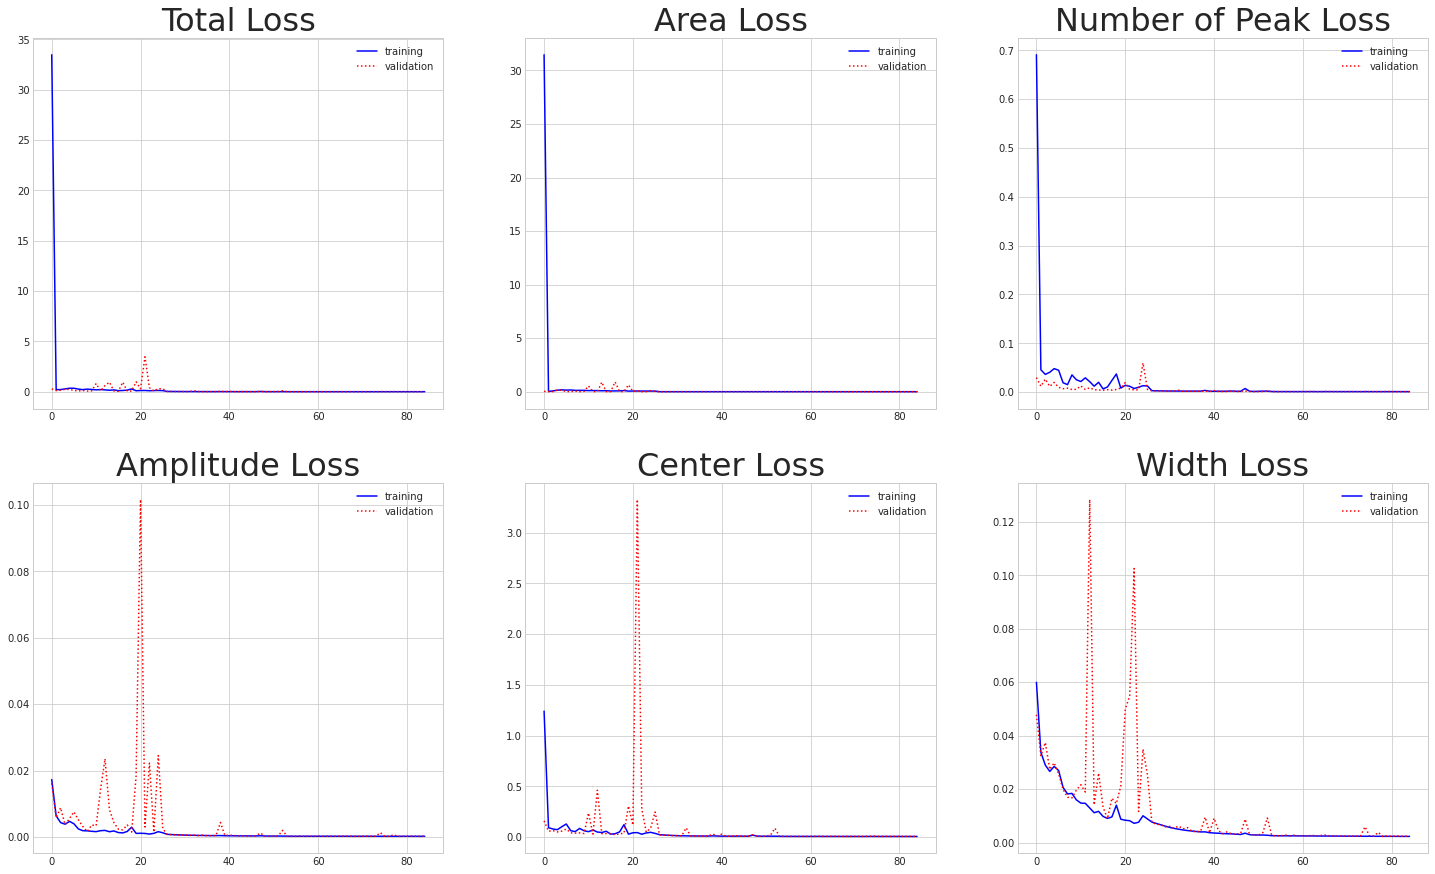

In [35]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Area Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



### Test data

In [36]:
print(test_graph.shape)

(50000, 401, 1)


In [37]:
prediction = model.predict(test_graph)
print(len(prediction))

5


In [38]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape)  # width

(50000, 1)
(50000, 1)
(50000, 3)
(50000, 3)
(50000, 3)


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


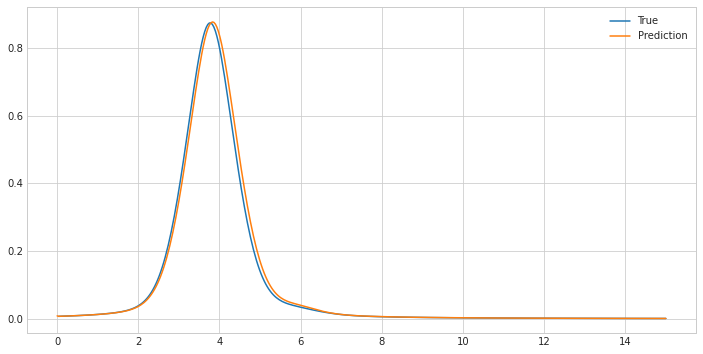

Predicted area: [38.428696]
     True area: 38.39893160239137
Predicted num_peak: [1.9959087]
     True num_peak: 2
Predicted amplitude: [0.8762512  0.01796506 0.00527863]
     True amplitude: [0.87349271 0.01506361 0.        ]
Predicted center: [3.832243   5.9082603  0.00940578]
     True center: [3.76967617 5.8229956  0.        ]
Predicted width: [1.4385353  1.2219236  0.01332699]
     True width: [1.41207612 1.48216062 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


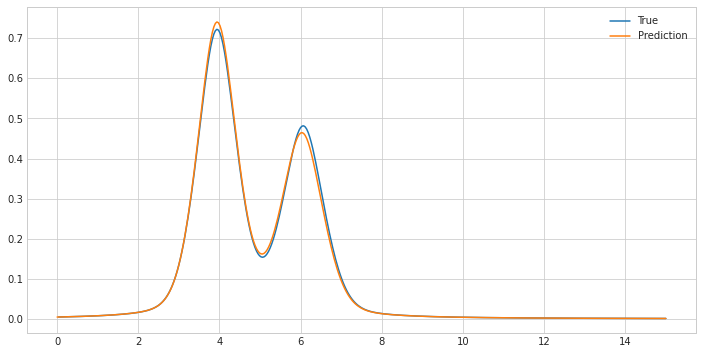

Predicted area: [42.35948]
     True area: 42.373016856216736
Predicted num_peak: [2.0183475]
     True num_peak: 2
Predicted amplitude: [ 0.7324001   0.45264068 -0.00303378]
     True amplitude: [0.71421982 0.47018547 0.        ]
Predicted center: [3.9402714e+00 6.0359774e+00 2.5799572e-03]
     True center: [3.94013203 6.0674079  0.        ]
Predicted width: [ 1.1355904   1.2081387  -0.00152142]
     True width: [1.14565015 1.18783181 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


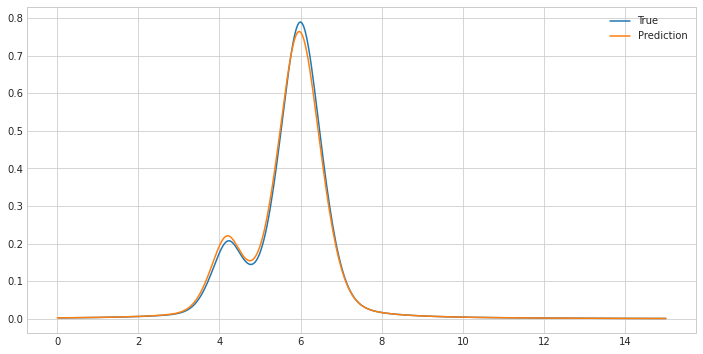

Predicted area: [34.815975]
     True area: 34.81578386217764
Predicted num_peak: [1.9585627]
     True num_peak: 2
Predicted amplitude: [ 0.19880114  0.7615222  -0.00211341]
     True amplitude: [0.18631577 0.78694085 0.        ]
Predicted center: [ 4.1785727e+00  5.9658384e+00 -2.1244735e-03]
     True center: [4.20775254 5.99481805 0.        ]
Predicted width: [ 0.95315933  1.2431127  -0.00163297]
     True width: [0.94747267 1.21066873 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


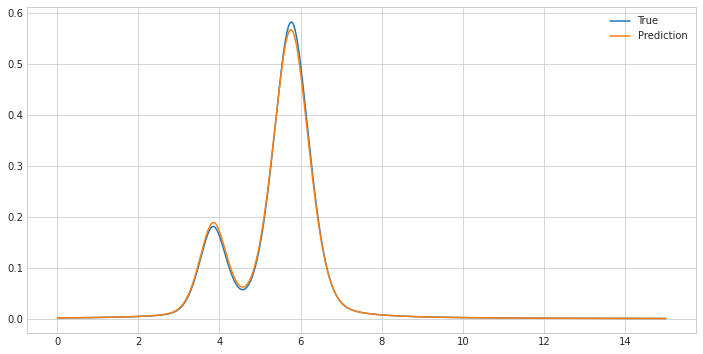

Predicted area: [22.972881]
     True area: 22.952623180226386
Predicted num_peak: [2.039339]
     True num_peak: 2
Predicted amplitude: [ 0.1795884   0.566187   -0.00076802]
     True amplitude: [0.17201185 0.58122945 0.        ]
Predicted center: [3.8469448  5.7610583  0.01582476]
     True center: [3.8409423  5.77049685 0.        ]
Predicted width: [ 8.1571424e-01  1.0567429e+00 -3.7670135e-04]
     True width: [0.80010263 1.04138311 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


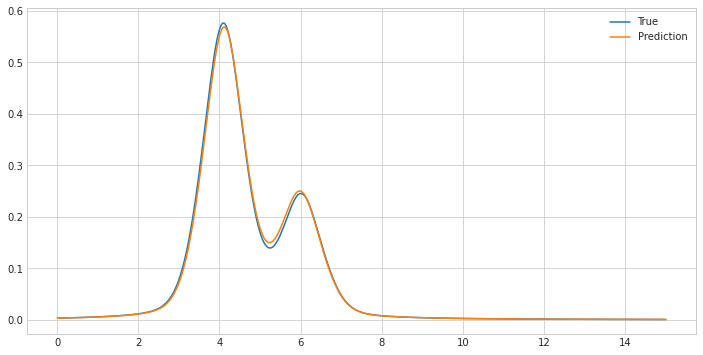

Predicted area: [29.643787]
     True area: 29.63935800648917
Predicted num_peak: [1.9877055]
     True num_peak: 2
Predicted amplitude: [0.56373906 0.23743235 0.00237761]
     True amplitude: [0.57192826 0.23292751 0.        ]
Predicted center: [4.1143484e+00 5.9910746e+00 2.0615608e-03]
     True center: [4.09622239 6.02021509 0.        ]
Predicted width: [1.1932709  1.2049472  0.00378604]
     True width: [1.20026269 1.19025671 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


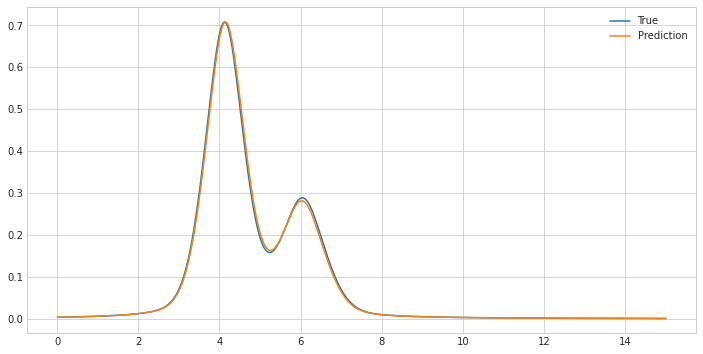

Predicted area: [34.856297]
     True area: 34.839611533484394
Predicted num_peak: [2.0271325]
     True num_peak: 2
Predicted amplitude: [0.7020319  0.2678194  0.00109883]
     True amplitude: [0.70176747 0.27578569 0.        ]
Predicted center: [ 4.1460137e+00  6.0388541e+00 -8.7739527e-04]
     True center: [4.12332708 6.05435735 0.        ]
Predicted width: [1.1239569  1.2447522  0.00282474]
     True width: [1.11924837 1.25621573 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


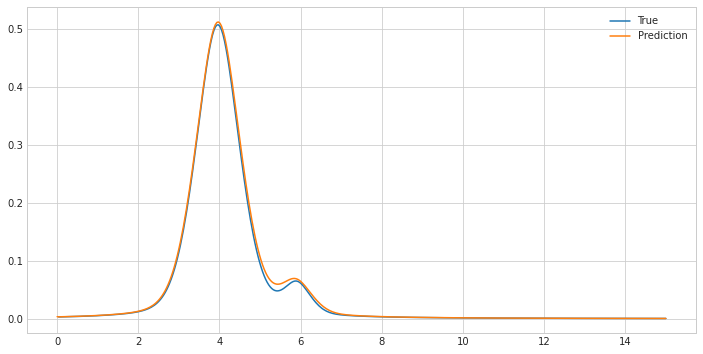

Predicted area: [20.959435]
     True area: 20.961423386059806
Predicted num_peak: [2.0360365]
     True num_peak: 2
Predicted amplitude: [0.5121429  0.0557445  0.00068682]
     True amplitude: [0.50759082 0.05286332 0.        ]
Predicted center: [3.9656324e+00 5.8851156e+00 2.9961467e-03]
     True center: [3.95882485 5.9077291  0.        ]
Predicted width: [1.2911658  0.9225757  0.00592072]
     True width: [1.26307487 0.7891154  0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


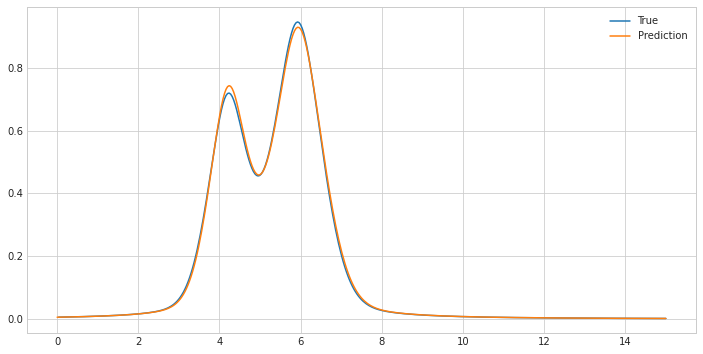

Predicted area: [62.881573]
     True area: 62.88324528404726
Predicted num_peak: [2.0325632]
     True num_peak: 2
Predicted amplitude: [ 6.9884855e-01  9.1320527e-01 -1.4777482e-04]
     True amplitude: [0.67816164 0.92927119 0.        ]
Predicted center: [4.21753    5.944089   0.01513165]
     True center: [4.2065834  5.93378499 0.        ]
Predicted width: [ 1.0959569   1.4092622  -0.00543101]
     True width: [1.1282851  1.37661194 0.        ]


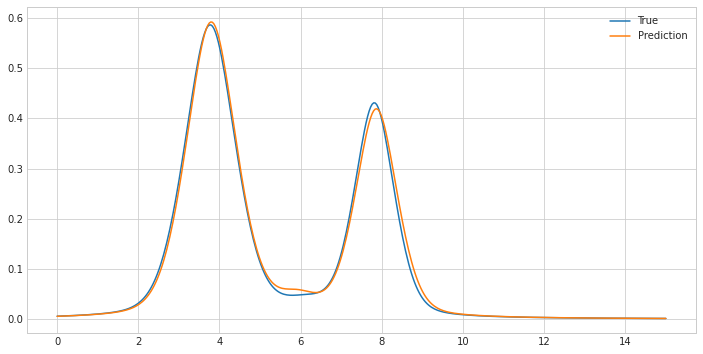

Predicted area: [42.876972]
     True area: 42.80985958594615
Predicted num_peak: [3.0006604]
     True num_peak: 3
Predicted amplitude: [0.5894679  0.03352842 0.41413495]
     True amplitude: [0.58400466 0.02429382 0.42553883]
Predicted center: [3.7971504 5.9280167 7.8674703]
     True center: [3.76992779 6.12958697 7.81749552]
Predicted width: [1.4593805 1.2301829 1.2248659]
     True width: [1.48699641 1.38122112 1.16187075]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


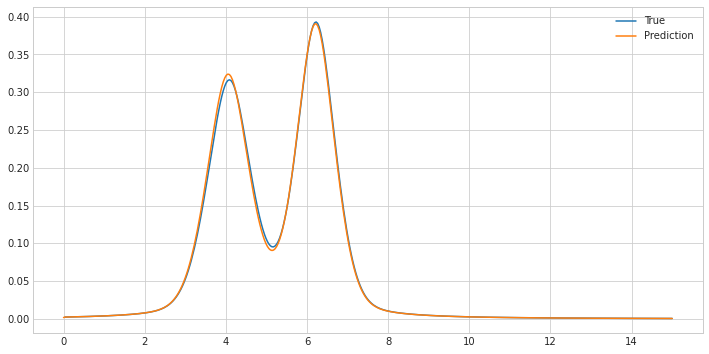

Predicted area: [25.355404]
     True area: 25.35727128292576
Predicted num_peak: [1.9869373]
     True num_peak: 2
Predicted amplitude: [ 0.31834254  0.38506564 -0.00131917]
     True amplitude: [0.31064437 0.38708879 0.        ]
Predicted center: [4.0551414e+00 6.2133484e+00 1.5183389e-03]
     True center: [4.08280589 6.22282402 0.        ]
Predicted width: [1.2342868  1.1164691  0.00279818]
     True width: [1.26007027 1.11663605 0.        ]


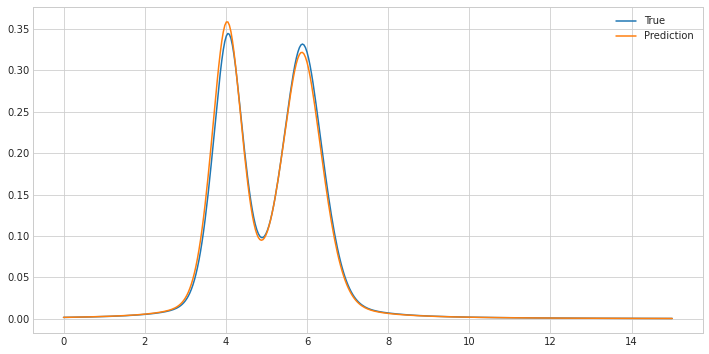

Predicted area: [21.343851]
     True area: 21.33668568786913
Predicted num_peak: [2.1245017]
     True num_peak: 3
Predicted amplitude: [ 0.35137153  0.31691277 -0.00356466]
     True amplitude: [3.36617922e-01 3.27029864e-01 3.14680226e-04]
Predicted center: [4.028454  5.876309  4.7049837]
     True center: [4.05542666 5.89087151 7.88800659]
Predicted width: [0.90931237 1.1860472  0.47146165]
     True width: [0.90025702 1.18698335 1.20541602]


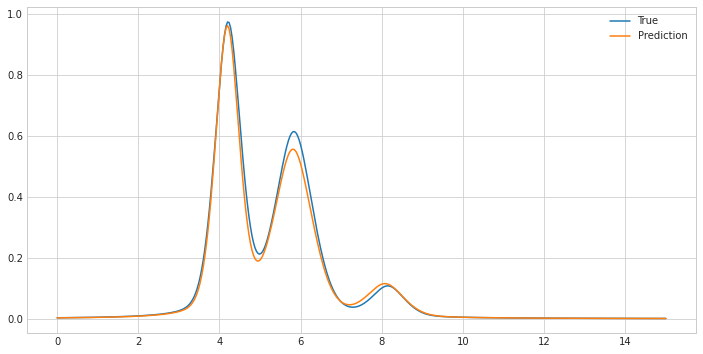

Predicted area: [45.627556]
     True area: 45.621020175842716
Predicted num_peak: [3.0184858]
     True num_peak: 3
Predicted amplitude: [0.9472669  0.5455383  0.10628714]
     True amplitude: [0.96003748 0.60245293 0.0985102 ]
Predicted center: [4.194059  5.8158035 8.08907  ]
     True center: [4.2118094  5.83806103 8.15745279]
Predicted width: [0.70697486 1.1125133  1.0632753 ]
     True width: [0.75711845 1.08675125 0.95261577]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


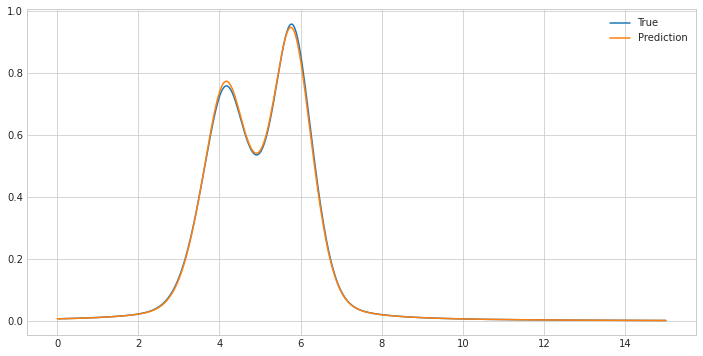

Predicted area: [64.78049]
     True area: 64.7534348943832
Predicted num_peak: [1.9939015]
     True num_peak: 2
Predicted amplitude: [0.74206954 0.9090055  0.00197537]
     True amplitude: [0.72838868 0.91829816 0.        ]
Predicted center: [4.1470222  5.7798047  0.01507321]
     True center: [4.15044406 5.7955432  0.        ]
Predicted width: [1.3585383  1.2033392  0.00497915]
     True width: [1.38973812 1.1920699  0.        ]


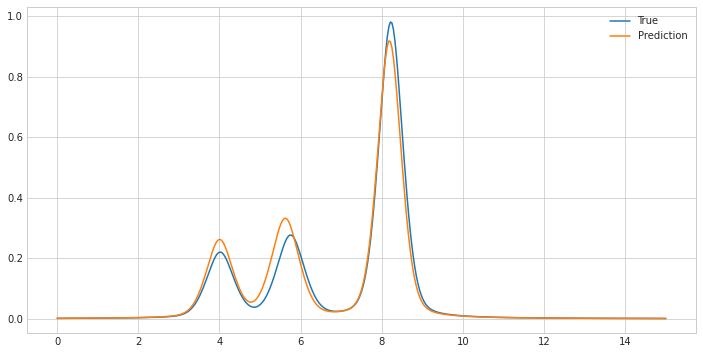

Predicted area: [33.49372]
     True area: 33.41657575600084
Predicted num_peak: [3.0224943]
     True num_peak: 3
Predicted amplitude: [0.25606245 0.32500127 0.91667175]
     True amplitude: [0.21529622 0.26953179 0.979257  ]
Predicted center: [4.0035734 5.6219845 8.189601 ]
     True center: [4.01675827 5.75228241 8.22438098]
Predicted width: [0.7764164 0.8097763 0.6946521]
     True width: [0.79358231 0.80961737 0.70273773]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


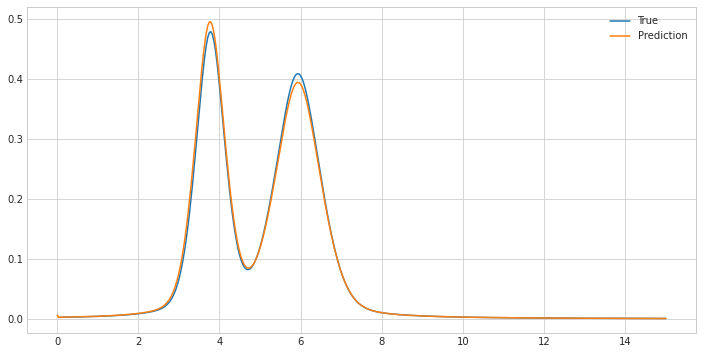

Predicted area: [28.598942]
     True area: 28.599256959036296
Predicted num_peak: [1.9961731]
     True num_peak: 2
Predicted amplitude: [0.48714346 0.38956937 0.00369679]
     True amplitude: [0.47022419 0.40438706 0.        ]
Predicted center: [ 3.7675705e+00  5.9377823e+00 -2.3987889e-04]
     True center: [3.77683216 5.93442067 0.        ]
Predicted width: [ 0.8696561   1.3216931  -0.00682911]
     True width: [0.84670276 1.30980886 0.        ]


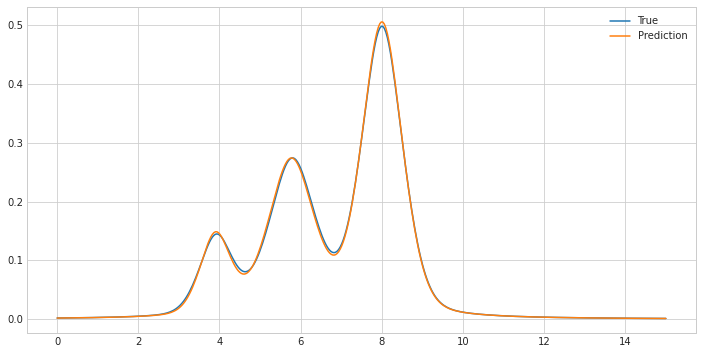

Predicted area: [33.47691]
     True area: 33.486585030377036
Predicted num_peak: [3.0082498]
     True num_peak: 3
Predicted amplitude: [0.13747345 0.26436597 0.4996328 ]
     True amplitude: [0.13385732 0.26397542 0.49202739]
Predicted center: [3.9041638 5.7702103 8.006743 ]
     True center: [3.91974677 5.79596784 8.00741049]
Predicted width: [0.9083499 1.3659282 1.1970835]
     True width: [0.98728094 1.3593902  1.21098448]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


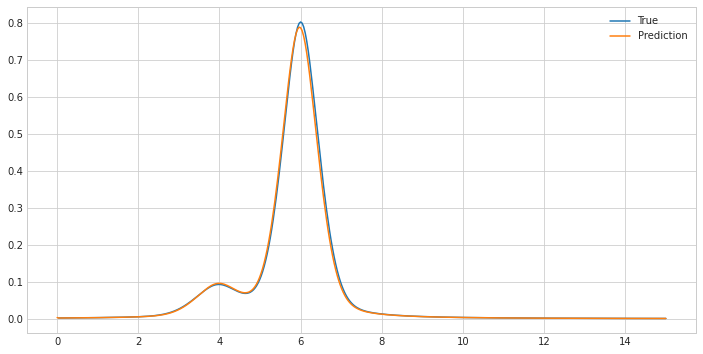

Predicted area: [29.262646]
     True area: 29.243444926210657
Predicted num_peak: [1.9849617]
     True num_peak: 2
Predicted amplitude: [0.08357526 0.7864636  0.00279739]
     True amplitude: [0.08083914 0.80033378 0.        ]
Predicted center: [3.9572077e+00 5.9737129e+00 2.6266128e-03]
     True center: [3.94899908 6.00178175 0.        ]
Predicted width: [1.2703161  1.0511508  0.00492543]
     True width: [1.31831602 1.05063264 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


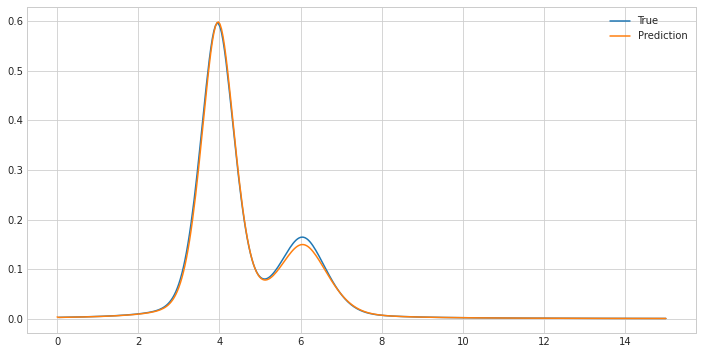

Predicted area: [24.9761]
     True area: 24.952592985594233
Predicted num_peak: [2.0115886]
     True num_peak: 2
Predicted amplitude: [0.5945588  0.1422115  0.00374786]
     True amplitude: [0.5921288  0.15699937 0.        ]
Predicted center: [3.9650464e+00 6.0609541e+00 8.2273781e-04]
     True center: [3.95068674 6.05294884 0.        ]
Predicted width: [ 9.8238599e-01  1.4456160e+00 -1.1503547e-03]
     True width: [1.0007007  1.38640798 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


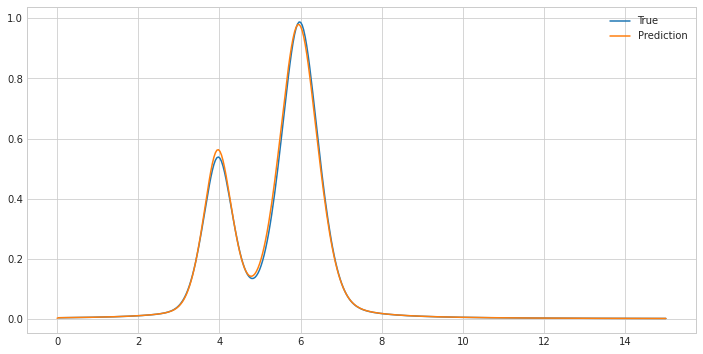

Predicted area: [47.308243]
     True area: 47.29648929178944
Predicted num_peak: [2.0054405]
     True num_peak: 2
Predicted amplitude: [ 0.54613185  0.9747317  -0.00153882]
     True amplitude: [0.52260935 0.98307629 0.        ]
Predicted center: [ 3.9608269e+00  5.9499941e+00 -2.9575825e-04]
     True center: [3.96556228 5.97653001 0.        ]
Predicted width: [ 0.8491638   1.1188259  -0.00903654]
     True width: [0.87873011 1.09099284 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


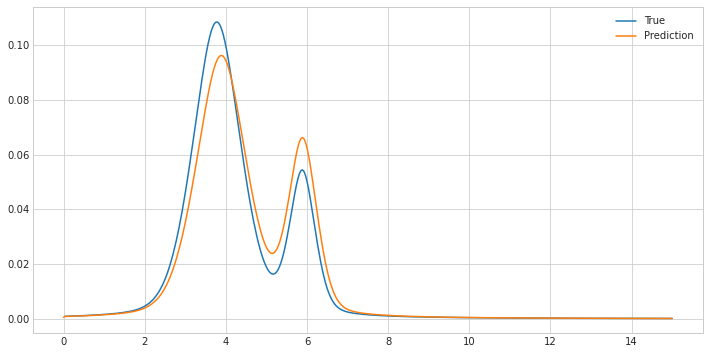

Predicted area: [5.8101573]
     True area: 5.81236474922823
Predicted num_peak: [2.0148795]
     True num_peak: 2
Predicted amplitude: [ 0.09568834  0.06316039 -0.00035931]
     True amplitude: [0.10819488 0.0517571  0.        ]
Predicted center: [ 3.8875539e+00  5.8940430e+00 -1.1383295e-03]
     True center: [3.77481278 5.88634194 0.        ]
Predicted width: [ 1.458466    0.83071905 -0.00524582]
     True width: [1.3946017  0.74567276 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


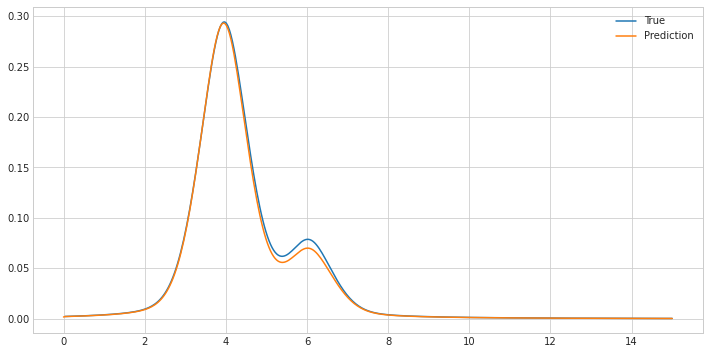

Predicted area: [15.517497]
     True area: 15.507202482993717
Predicted num_peak: [2.0101967]
     True num_peak: 2
Predicted amplitude: [ 0.29157445  0.06285226 -0.00148628]
     True amplitude: [0.292596   0.07106883 0.        ]
Predicted center: [3.9439907e+00 6.0553055e+00 3.0797124e-03]
     True center: [3.95834669 6.05586888 0.        ]
Predicted width: [1.3742898  1.3762157  0.00436778]
     True width: [1.40275044 1.34725986 0.        ]


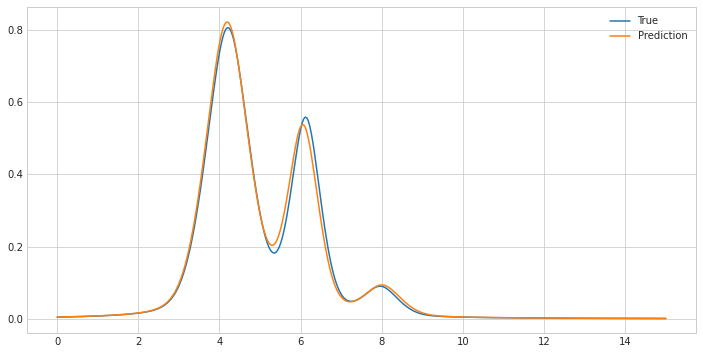

Predicted area: [47.617756]
     True area: 47.61627030965103
Predicted num_peak: [3.0060353]
     True num_peak: 3
Predicted amplitude: [0.8147309  0.5153285  0.08268085]
     True amplitude: [0.79949652 0.53760861 0.07859043]
Predicted center: [4.1880994 6.059145  8.018286 ]
     True center: [4.20653866 6.12676582 7.97641245]
Predicted width: [1.2498975 0.8928824 1.0699059]
     True width: [1.25409653 0.86441485 1.00108249]


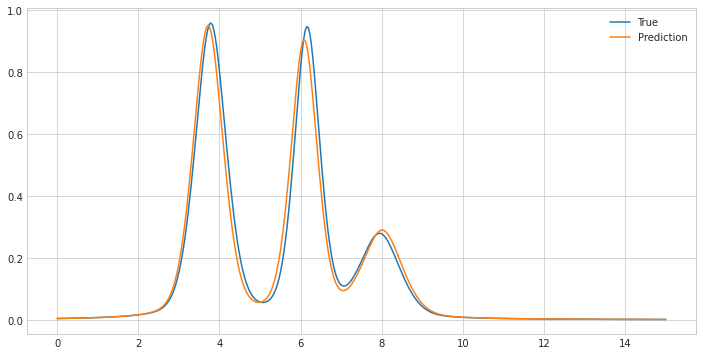

Predicted area: [57.78517]
     True area: 57.779767924562144
Predicted num_peak: [2.9892116]
     True num_peak: 3
Predicted amplitude: [0.9443299  0.8917626  0.27950677]
     True amplitude: [0.95253092 0.93358465 0.26778012]
Predicted center: [3.7199445 6.087058  8.015042 ]
     True center: [3.78485752 6.1610484  7.95334886]
Predicted width: [0.8847008 0.7789071 1.1611205]
     True width: [0.90662641 0.74234587 1.16558349]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


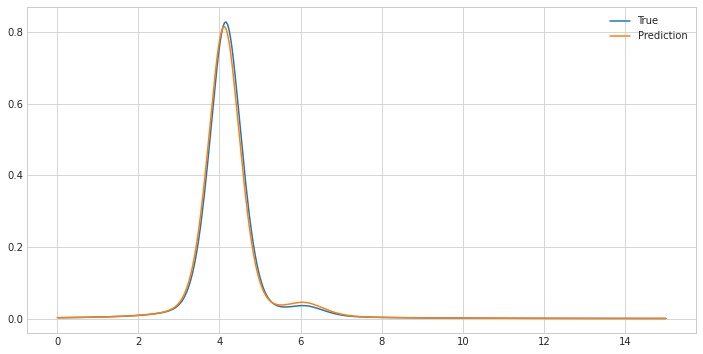

Predicted area: [24.76864]
     True area: 24.792713118126986
Predicted num_peak: [2.0434196]
     True num_peak: 2
Predicted amplitude: [0.81562555 0.03517553 0.00355898]
     True amplitude: [0.82857535 0.02563563 0.        ]
Predicted center: [4.115475   6.1070957  0.01318768]
     True center: [4.15219782 6.13245073 0.        ]
Predicted width: [0.9403198  1.1560023  0.00295441]
     True width: [0.93618177 1.07565659 0.        ]


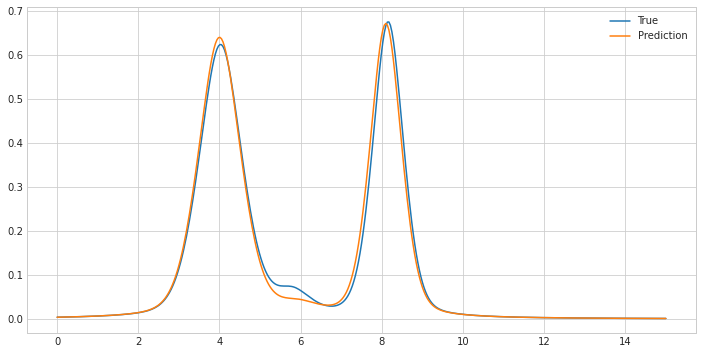

Predicted area: [43.97462]
     True area: 43.998463075108056
Predicted num_peak: [2.9947429]
     True num_peak: 3
Predicted amplitude: [0.6375904  0.02400507 0.66775155]
     True amplitude: [0.62110848 0.04961995 0.67192846]
Predicted center: [4.000654 5.921824 8.100223]
     True center: [4.02661475 5.8053302  8.15795653]
Predicted width: [1.2309246  1.1888108  0.91842186]
     True width: [1.24743749 1.02904994 0.89567486]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


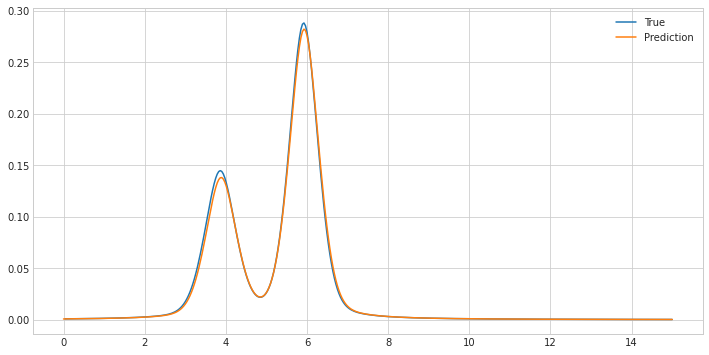

Predicted area: [11.3891]
     True area: 11.389013921286708
Predicted num_peak: [2.0371344]
     True num_peak: 2
Predicted amplitude: [ 0.13528293  0.28063476 -0.00406405]
     True amplitude: [0.14198806 0.2865772  0.        ]
Predicted center: [3.8830848e+00 5.9311728e+00 2.4179667e-03]
     True center: [3.86132194 5.91848064 0.        ]
Predicted width: [0.8936101  0.8575562  0.00140598]
     True width: [0.90029771 0.83837659 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


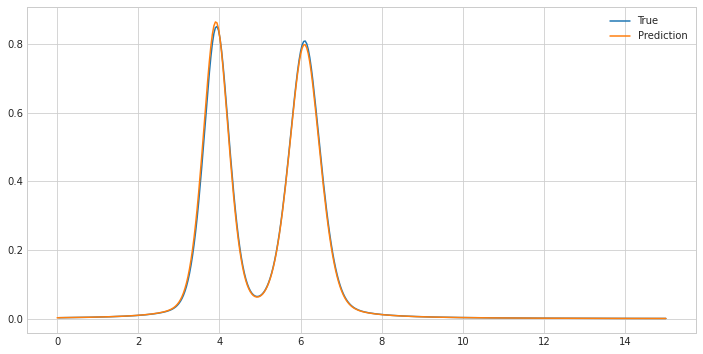

Predicted area: [42.7224]
     True area: 42.69179450625131
Predicted num_peak: [2.0280151]
     True num_peak: 2
Predicted amplitude: [ 0.8564359   0.7922722  -0.00355146]
     True amplitude: [0.84277672 0.80283061 0.        ]
Predicted center: [3.9113140e+00 6.0960283e+00 8.2737207e-04]
     True center: [3.92722904 6.09980258 0.        ]
Predicted width: [ 7.6171744e-01  9.1608262e-01 -7.5887144e-04]
     True width: [0.75894154 0.92163306 0.        ]


<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-db1ab6dadf2e>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


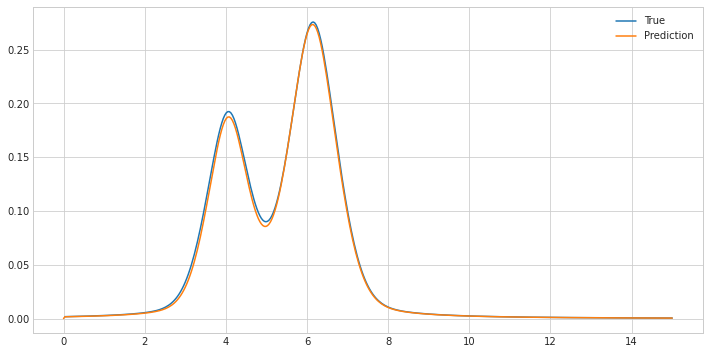

Predicted area: [18.685694]
     True area: 18.681113981166536
Predicted num_peak: [1.9969457]
     True num_peak: 2
Predicted amplitude: [ 0.18068951  0.2701339  -0.00170917]
     True amplitude: [0.18569466 0.27206781 0.        ]
Predicted center: [4.0609970e+00 6.1432352e+00 1.1224449e-03]
     True center: [4.05681124 6.15315598 0.        ]
Predicted width: [ 1.1964182   1.3814073  -0.00640626]
     True width: [1.24692572 1.38312238 0.        ]


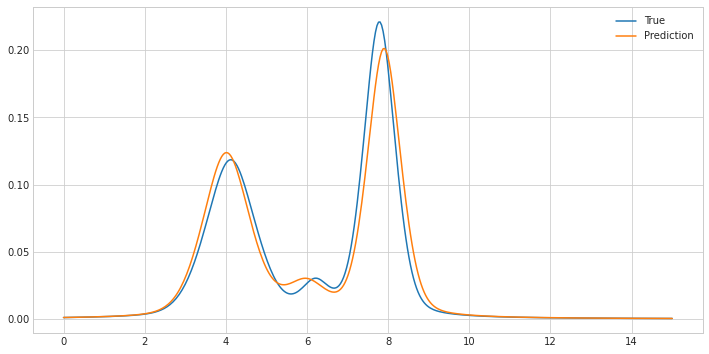

Predicted area: [12.084373]
     True area: 12.090284214712389
Predicted num_peak: [3.0231178]
     True num_peak: 3
Predicted amplitude: [0.12264867 0.02375619 0.20013604]
     True amplitude: [0.11755236 0.02283784 0.21998008]
Predicted center: [4.0132294 5.97849   7.8988037]
     True center: [4.11930451 6.20882997 7.78385633]
Predicted width: [1.3789501  1.1838802  0.98290825]
     True width: [1.44687428 0.84140138 0.92350251]


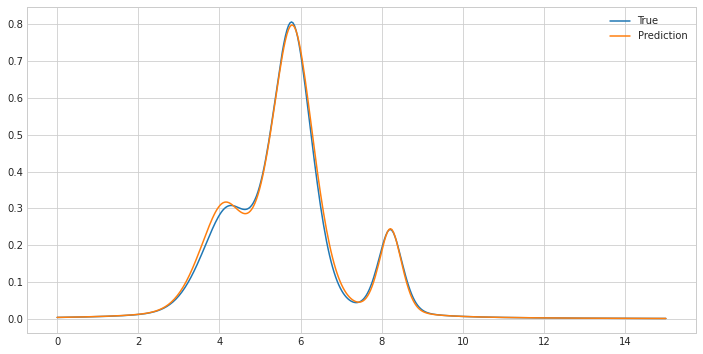

Predicted area: [46.48875]
     True area: 46.44189836124725
Predicted num_peak: [2.9981003]
     True num_peak: 3
Predicted amplitude: [0.28914583 0.7826538  0.2314556 ]
     True amplitude: [0.27805096 0.78274648 0.23036826]
Predicted center: [4.1019692 5.7976427 8.215244 ]
     True center: [4.19910852 5.788056   8.21024464]
Predicted width: [1.4047072  1.2496479  0.66955847]
     True width: [1.49634379 1.18272812 0.72362455]


In [39]:
for i in range(30):
    
    test_amp[i] = np.array(test_amp[i])
    test_center[i] = np.array(test_center[i])
    test_width[i] = np.array(test_width[i])
    
    test_params = np.stack((test_amp[i], test_center[i], test_width[i]))
    test_params = test_params.T.reshape(9)
    test_params = list(test_params)
    
    #########################################################
    prediction[2][i] = np.array(prediction[2][i])
    prediction[3][i] = np.array(prediction[3][i])
    prediction[4][i] = np.array(prediction[4][i])
    
    predict_params = np.stack((prediction[2][i], prediction[3][i], prediction[4][i]))
    predict_params = predict_params.T.reshape(9)
    predict_params = list(predict_params)
    
    ########################################################
    print('======================================================================')
    plt.figure(figsize = (12, 6))
    plt.plot(x, voigt(x, *test_params), label = 'True')
    plt.plot(x, voigt(x, *predict_params), label = 'Prediction')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print("Predicted area:", prediction[0][i])
    print("     True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("     True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("     True amplitude:", test_amp[i] )

    print("Predicted center:", prediction[3][i])
    print("     True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("     True width:", test_width[i])
    print('======================================================================')
    
    

# Real XPS data fitting

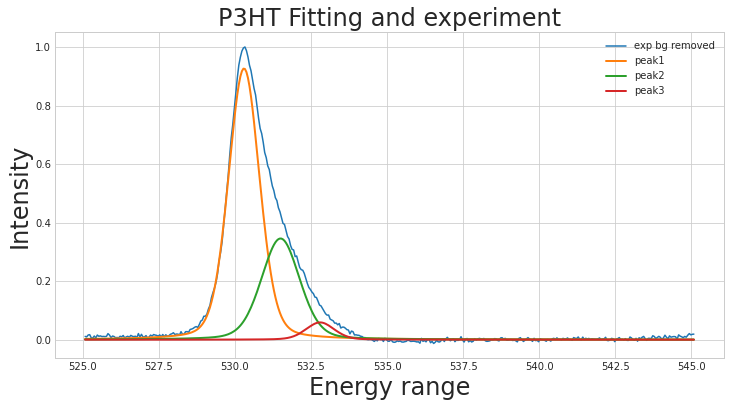

In [40]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()


In [41]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [42]:
predict = model.predict(test_result)
print(predict)


[array([[38.996056]], dtype=float32), array([[2.7858906]], dtype=float32), array([[0.06346665, 0.04572342, 0.9544008 ]], dtype=float32), array([[3.7468565, 6.1098433, 9.866056 ]], dtype=float32), array([[1.2301754, 1.514658 , 1.1650257]], dtype=float32)]


In [43]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [44]:
new_predict

[array([38.996056], dtype=float32),
 array([2.7858906], dtype=float32),
 array([0.06346665, 0.04572342, 0.9544008 ], dtype=float32),
 array([3.7468565, 6.1098433, 9.866056 ], dtype=float32),
 array([1.2301754, 1.514658 , 1.1650257], dtype=float32)]

In [45]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(3,)
(3,)
(3,)


In [46]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]

predict_params = peak_1 + peak_2 + peak_3

In [66]:
print(predict_params)

[-0.047801703, 4.139407, 1.4313159, 0.081543155, 5.917025, 1.5437288, 0.75124574, 7.9207797, 0.9831673]


# 비교

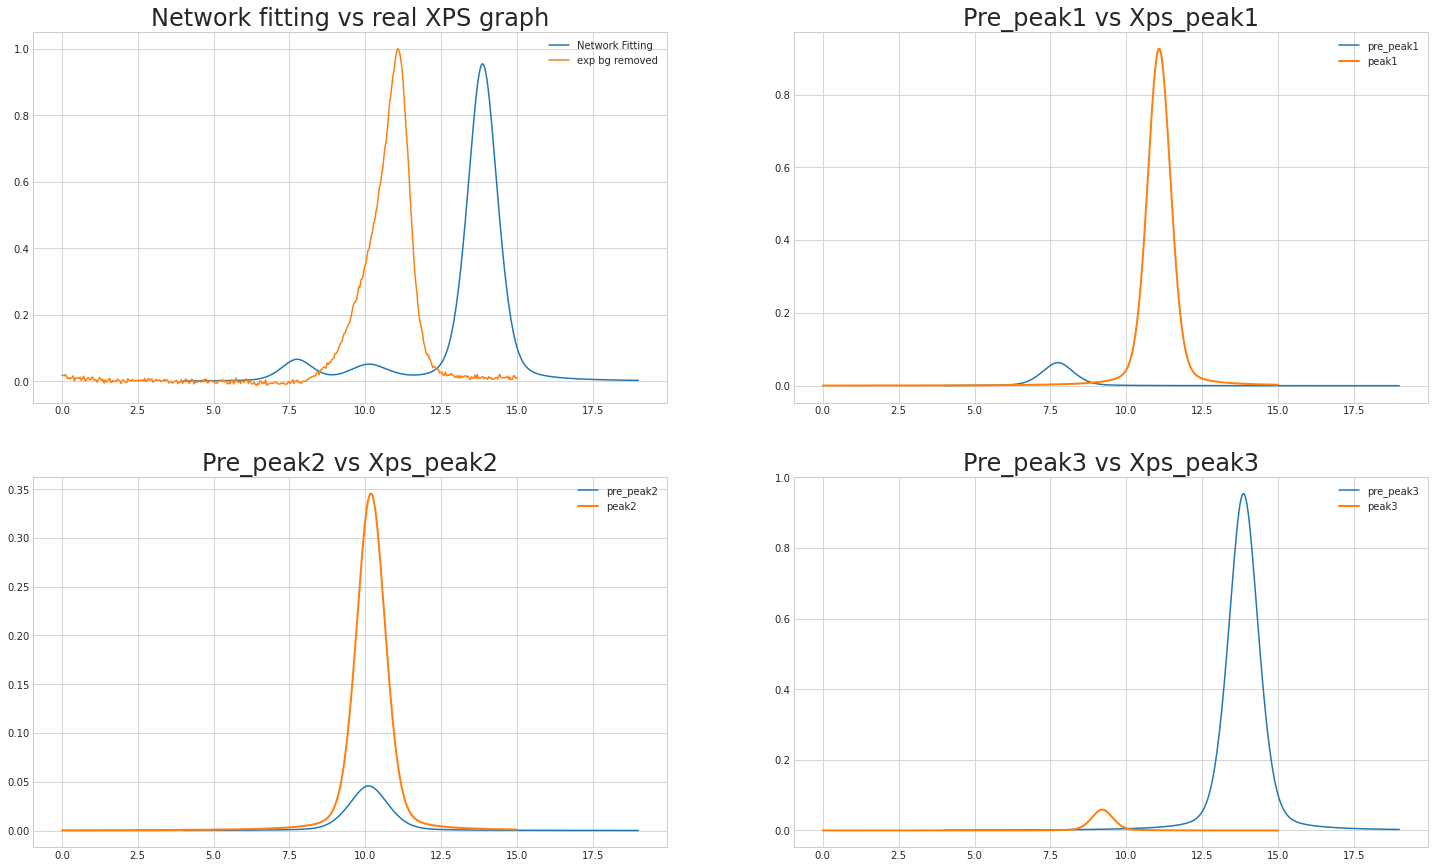

In [47]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()




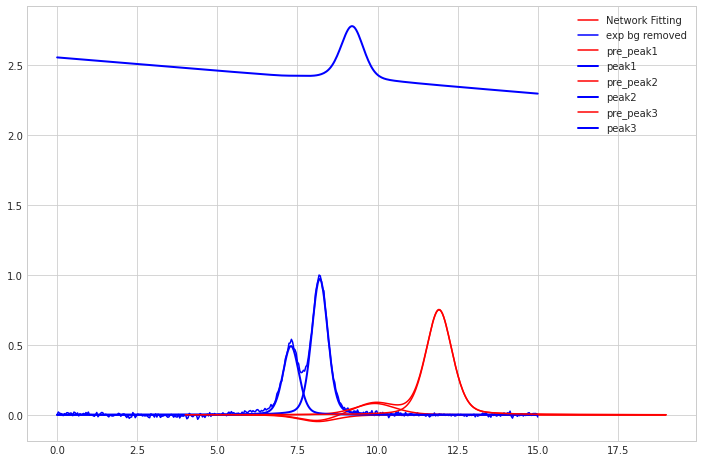

In [65]:
plt.figure(figsize = (12, 8))

plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')


plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1',  color = 'red')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color = 'blue')


plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2',  color = 'red')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2, color = 'blue')

plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3',  color = 'red')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2, color = 'blue')

plt.legend()
plt.show()



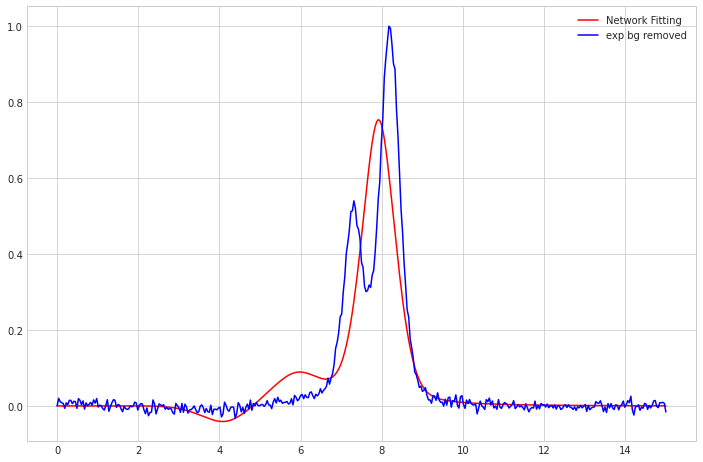

In [62]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')

plt.legend()
plt.show()



In [52]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

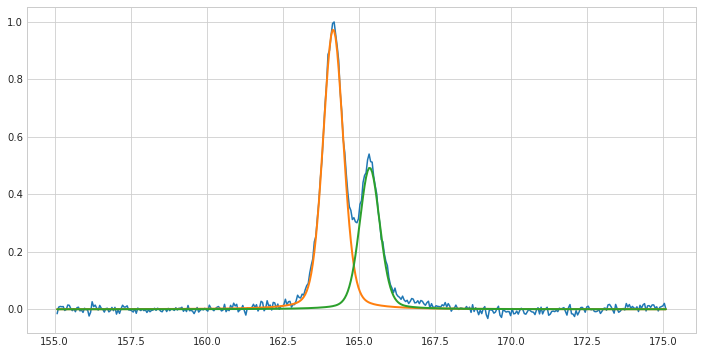

In [53]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)


In [54]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [55]:
predict = model.predict(test_result)
print(predict)

[array([[28.62295]], dtype=float32), array([[2.9763536]], dtype=float32), array([[-0.0478017 ,  0.08154316,  0.75124574]], dtype=float32), array([[4.139407 , 5.917025 , 7.9207797]], dtype=float32), array([[1.4313159, 1.5437288, 0.9831673]], dtype=float32)]


In [56]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [57]:
new_predict

[array([28.62295], dtype=float32),
 array([2.9763536], dtype=float32),
 array([-0.0478017 ,  0.08154316,  0.75124574], dtype=float32),
 array([4.139407 , 5.917025 , 7.9207797], dtype=float32),
 array([1.4313159, 1.5437288, 0.9831673], dtype=float32)]

In [58]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(3,)
(3,)
(3,)


In [59]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]

predict_params = peak_1 + peak_2 + peak_3

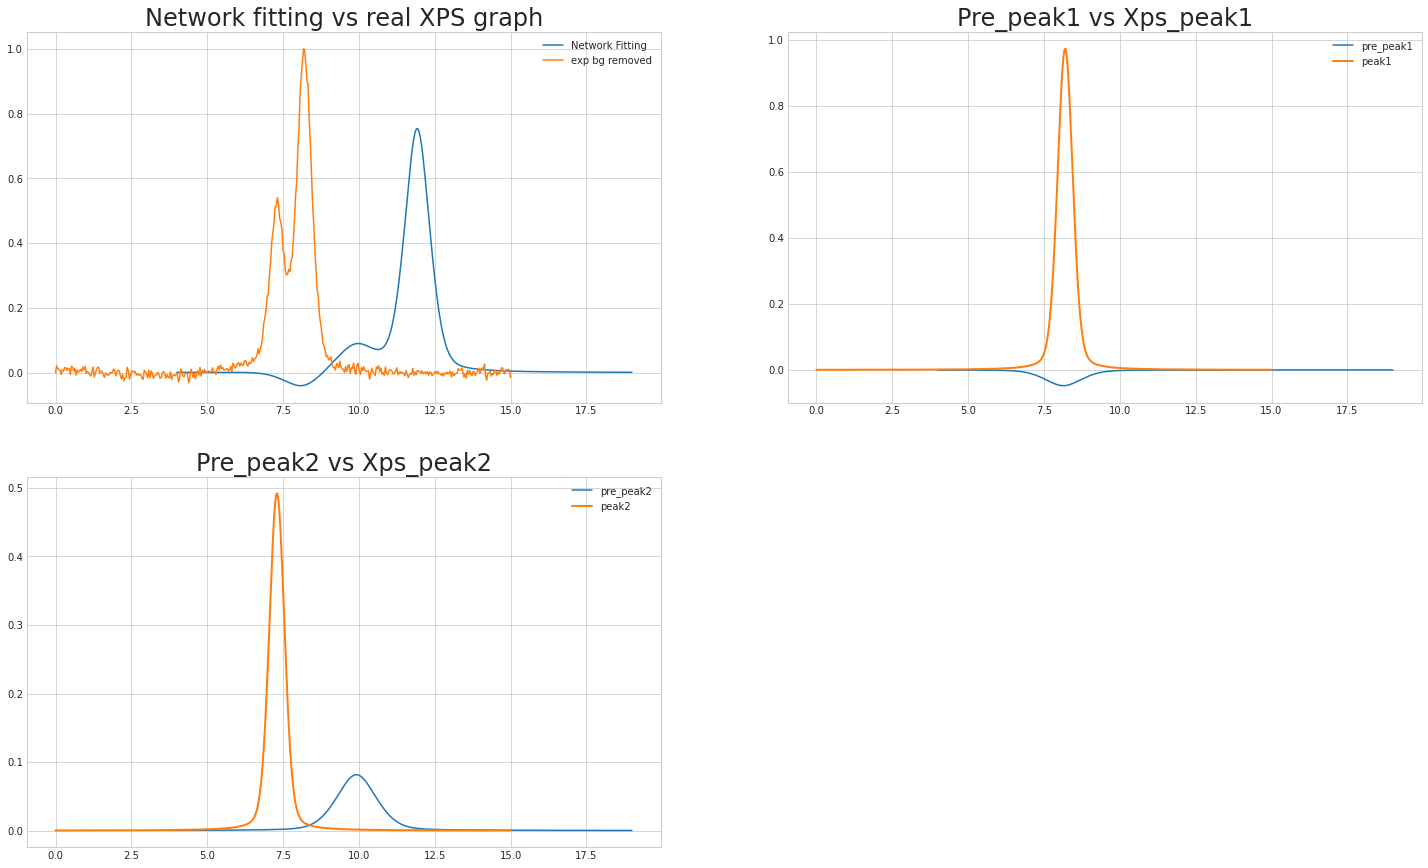

In [60]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


#plt.subplot(224)
#plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
#plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
#plt.title("Pre_peak3 vs Xps_peak3", size = 24)
#plt.legend()
#plt.show()



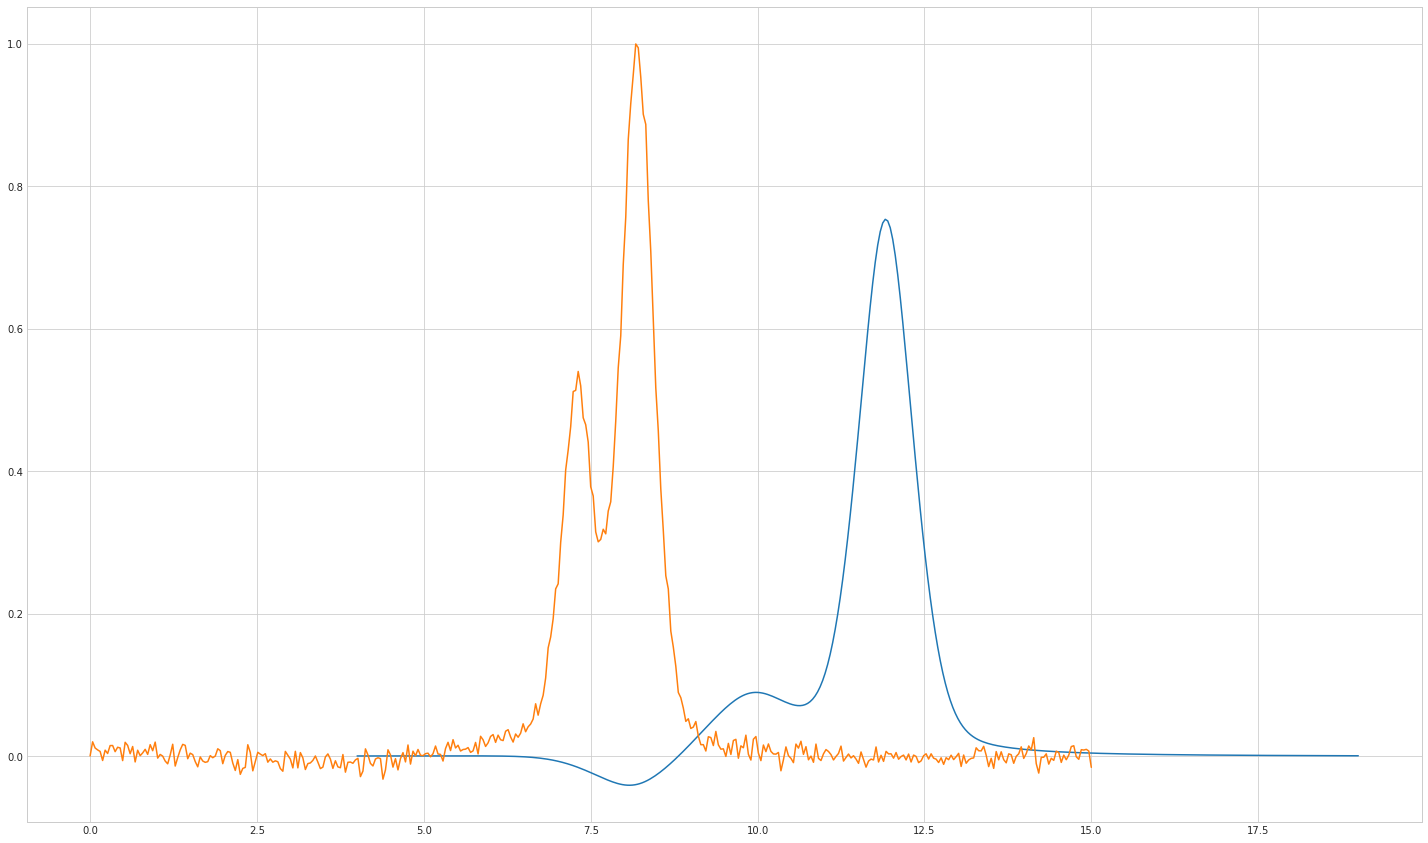

In [61]:
plt.figure(figsize = (25, 15))

plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")


